### Import Libraries and Test Images

In [1]:
# standard imports
from typing import Dict, List
import numpy as np
import xarray as xr
import pandas as pd
import rioxarray
import matplotlib.pyplot as plt

# load up the saved dataset
import pickle
with open('/Users/Adrian/Documents/VS CODE/spicy-snow/tests/test_data/2_img_ds', 'rb') as f:
    ds = pickle.load(f)

# add module to path so python can import it. This is the directory with 
# the __init__.py file in it to let python know this is a module.
import sys
sys.path.append('/Users/Adrian/Documents/VS CODE/spicy-snow/spicy_snow')

# import the function to test
from processing.s1_preprocessing import s1_amp_to_dB, s1_dB_to_amp, merge_partial_s1_images

#dataset = ds.isel(time = slice(1, 3))
dataset = ds

In [2]:
dataset

<xarray.Dataset>
Dimensions:         (x: 292, y: 292, band: 3, time: 3)
Coordinates:
  * x               (x) float64 -114.1 -114.1 -114.1 ... -114.0 -114.0 -114.0
  * y               (y) float64 43.1 43.1 43.1 43.1 43.1 ... 43.0 43.0 43.0 43.0
  * band            (band) <U3 'VV' 'VH' 'inc'
    spatial_ref     int64 0
  * time            (time) datetime64[ns] 2019-02-25T01:27:19 ... 2019-03-21T...
    flight_dir      (time) <U9 'ascending' 'ascending' 'ascending'
    platform        (time) <U3 'S1B' 'S1B' 'S1B'
    relative_orbit  (time) int64 20 20 20
    projection      int64 0
Data variables:
    s1              (time, band, y, x) float32 0.1726 0.158 ... 0.6242 0.6236
    ims             (time, y, x) int8 4 4 4 4 4 4 4 4 4 4 ... 2 2 2 2 2 2 2 2 2
    fcf             (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     0.0

### Plot Incidence Angles Before Mask

(array([2.92000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.80000e+01,
        1.10900e+03, 5.92980e+04, 1.87979e+05, 6.90800e+03, 1.88000e+02]),
 array([0.        , 0.08472268, 0.16944537, 0.25416803, 0.33889073,
        0.4236134 , 0.50833607, 0.59305876, 0.67778146, 0.7625041 ,
        0.8472268 ]),
 <BarContainer object of 10 artists>)

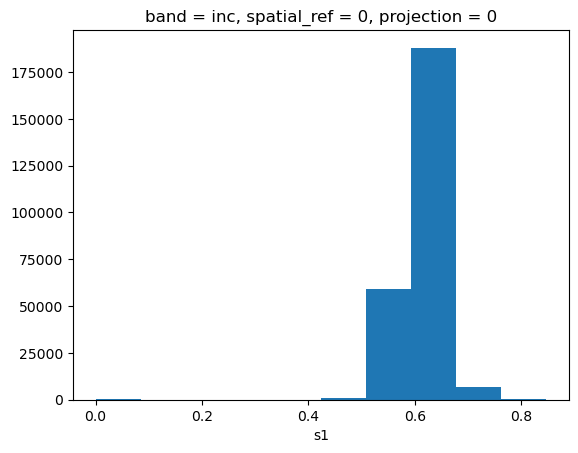

In [ ]:
# BEFORE

#s1_inc = s1[0, 2]
#s1_inc >= 0.7
#s1[dict(time=0, band=2)]

s1 = dataset.s1
s1_inc = s1.drop_sel(band=['VV', 'VH'])
s1_inc.plot()

### Test Masking Function

In [ ]:
# Select incidence angle from s1 data array
for band in ['inc']:
    data = dataset['s1'].sel(band=band)

    # Mask pixels with incidence angle > 70 degrees ('inc' <= 0.7)
    data_masked = data.where(data <= 0.7)

    dataset['s1'].loc[dict(band = band)] = data_masked

### Plot Incidence Angles After Mask

(array([2.9200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3000e+01, 4.8400e+02, 1.1809e+04, 1.7888e+05, 6.1594e+04]),
 array([0.        , 0.06999706, 0.13999411, 0.20999116, 0.27998823,
        0.34998527, 0.41998231, 0.48997939, 0.55997646, 0.62997347,
        0.69997054]),
 <BarContainer object of 10 artists>)

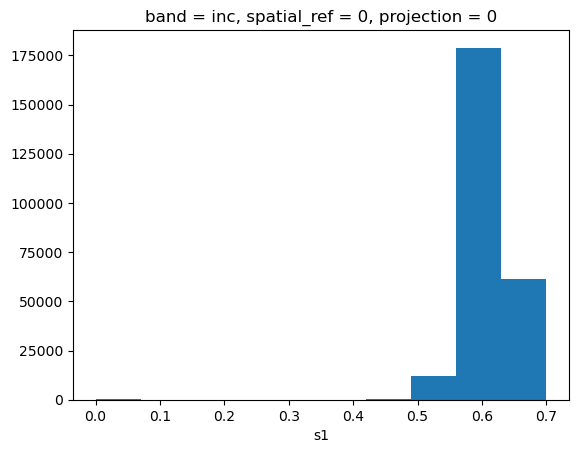

In [ ]:
# AFTER
s1_after = dataset.s1
s1_afterinc = s1_after.drop_sel(band=['VV', 'VH'])
s1_afterinc.plot()

## FINAL FUNCTION

In [ ]:
def s1_incidence_angle_masking(dataset: xr.Dataset, inplace: bool = False) -> xr.Dataset:
"""
Remove s1 image outliers by masking pixels with incidence angles > 70 degrees

Args:
dataset: Xarray Dataset of sentinel images to mask incidence angle outliers

Returns:
dataset: Xarray Dataset of sentinel images with incidence angles > 70 degrees
masked
"""
 
# Check inplace flag
if not inplace:
        dataset = dataset.copy(deep=True)

# Mask pixels with incidence angle > 70 degrees
for band in ['inc']:
        data = dataset['s1'].sel(band=band)

        # Mask array ('inc' <= 0.7)
        data_masked = data.where(data <= 0.7)

        dataset['s1'].loc[dict(band = band)] = data_masked

if not inplace:
        return dataset